In [1]:
%matplotlib inline
import os
os.chdir("../..")

import math
import matplotlib.patches as mpatches
import config
from sympy import Interval
from session import SessionMapper
from tama import tama, tama_standard_error
import pandas as pd


mapper = SessionMapper()

sessions = []

def load_session(session_number):
    num = str(session_number).zfill(2)
    name = "session-%s" % num
    tasks_path = "data/games-corpus/session_%s/s%s.objects.1.tasks" % (num, num)
    
    return mapper.fetch(tasks_path, name=name)

session = load_session(2)

In [2]:

task = session.tasks[7]
speech = task.speechA

In [3]:
speech.get_features(speech.interval)

#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no defined phonemes. Defaulting to 0
#() has no

{'ENG_MAX': 86.592,
 'ENG_MEAN': 53.666,
 'ENG_MIN': 31.165,
 'ENG_STDV': 13.888,
 'F0_MAS': 241.055,
 'F0_MAX': 502.933,
 'F0_MEAN': 210.188,
 'F0_MEDIAN': 209.434,
 'F0_MIN': 56.517,
 'F0_STDV': 69.71,
 'NOISE_TO_HARMONICS_RATIO': 0.124211,
 'PHONEMES_AVG': 3.35378258864440,
 'PHONEMES_COUNT': 1539,
 'SECONDS': 458.885,
 'SOUND_ALL_LOCAL_JITTER': 0.010541,
 'SOUND_ALL_LOCAL_SHIMMER': 0.087533,
 'SOUND_VOICED_LOCAL_JITTER': 0.009916,
 'SOUND_VOICED_LOCAL_SHIMMER': 0.084203,
 'SYLLABES_AVG': 1.41865657258447,
 'SYLLABES_COUNT': 651,
 'VCD2TOT_FRAMES': 0.237}

In [4]:
feature = "F0_MEAN"

series, mu = tama(speech, feature)
n = len(series)
se = tama_standard_error(speech, feature)

print "Media tama= %.4f" % mu

print "media muestral = %.4f" % series.mean()

variance = ((series - series.mean()) ** 2).sum() / series.size
stdv = math.sqrt(variance)

print "tama S.E = %.4f" % se

print "S.E muestral= %.4f" % stdv

Media tama= 230.4140
media muestral = 233.6743
tama S.E = 6.6008
S.E muestral= 40.5416


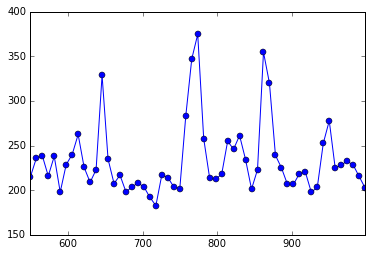

In [5]:
series.plot(style="o-")

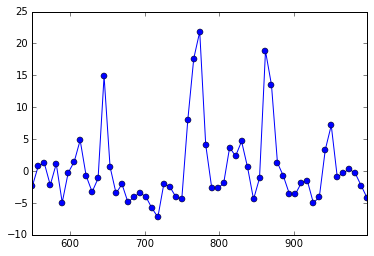

In [6]:
norm_series = pd.Series((series - mu) / se, dtype=float)

norm_series.plot(style="o-")

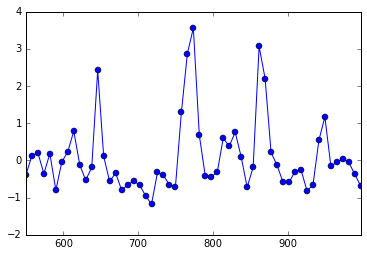

In [7]:
norm_series = pd.Series((series - mu) / stdv, dtype=float)

norm_series.plot(style="o-")